In [71]:
import tensorflow as tf
import matplotlib.pyplot as plt
import cv2
import os
import numpy as np


from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import RMSprop

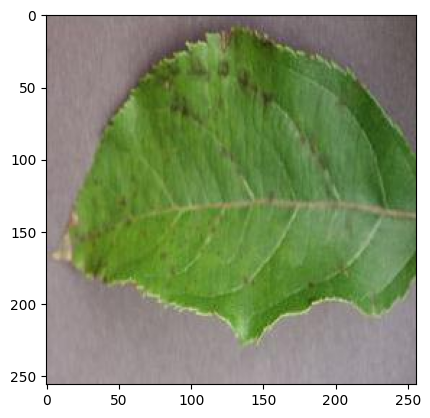

In [72]:
img = image.load_img(
    "/Users/dheemankumar/Desktop/FILE/ST lab/plant project/train/Apple___Apple_scab/0a5e9323-dbad-432d-ac58-d291718345d9___FREC_Scab 3417_90deg.JPG")
plt.imshow(img)

In [73]:
train = ImageDataGenerator(rescale=1/255)
validation = ImageDataGenerator(rescale=1/255)

In [74]:
train


In [75]:
train_dataset = train.flow_from_directory("plant project/train",
                                          target_size=(200, 200),
                                          batch_size=32,
                                          class_mode="categorical",
                                          shuffle=True,
                                          seed=42
                                          )

validation_dataset = validation.flow_from_directory("plant project/valid",
                                                    target_size=(200, 200),
                                                    batch_size=32,
                                                    class_mode="categorical",
                                                    shuffle=True,
                                                    seed=42
                                                    )

Found 39889 images belonging to 38 classes.
Found 9414 images belonging to 38 classes.


In [76]:
validation_dataset[0]

(array([[[[0.86274517, 0.82745105, 0.8078432 ],
          [0.85098046, 0.81568635, 0.7960785 ],
          [0.83921576, 0.80392164, 0.7843138 ],
          ...,
          [0.78823537, 0.73333335, 0.72156864],
          [0.7686275 , 0.7137255 , 0.7019608 ],
          [0.7294118 , 0.6745098 , 0.6627451 ]],
 
         [[0.8235295 , 0.78823537, 0.7686275 ],
          [0.81568635, 0.7803922 , 0.7607844 ],
          [0.81568635, 0.7803922 , 0.7607844 ],
          ...,
          [0.74509805, 0.6901961 , 0.6784314 ],
          [0.7607844 , 0.7058824 , 0.69411767],
          [0.75294125, 0.69803923, 0.6862745 ]],
 
         [[0.86666673, 0.8313726 , 0.8117648 ],
          [0.8470589 , 0.8117648 , 0.79215693],
          [0.8235295 , 0.78823537, 0.7686275 ],
          ...,
          [0.7176471 , 0.6627451 , 0.6509804 ],
          [0.75294125, 0.69803923, 0.6862745 ],
          [0.7568628 , 0.7019608 , 0.6901961 ]],
 
         ...,
 
         [[0.48235297, 0.4039216 , 0.37647063],
          [0.47058

In [77]:
validation_dataset.class_indices

{'Apple___Apple_scab': 0,
 'Apple___Black_rot': 1,
 'Apple___Cedar_apple_rust': 2,
 'Apple___healthy': 3,
 'Blueberry___healthy': 4,
 'Cherry_(including_sour)___Powdery_mildew': 5,
 'Cherry_(including_sour)___healthy': 6,
 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot': 7,
 'Corn_(maize)___Common_rust_': 8,
 'Corn_(maize)___Northern_Leaf_Blight': 9,
 'Corn_(maize)___healthy': 10,
 'Grape___Black_rot': 11,
 'Grape___Esca_(Black_Measles)': 12,
 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)': 13,
 'Grape___healthy': 14,
 'Orange___Haunglongbing_(Citrus_greening)': 15,
 'Peach___Bacterial_spot': 16,
 'Peach___healthy': 17,
 'Pepper,_bell___Bacterial_spot': 18,
 'Pepper,_bell___healthy': 19,
 'Potato___Early_blight': 20,
 'Potato___Late_blight': 21,
 'Potato___healthy': 22,
 'Raspberry___healthy': 23,
 'Soybean___healthy': 24,
 'Squash___Powdery_mildew': 25,
 'Strawberry___Leaf_scorch': 26,
 'Strawberry___healthy': 27,
 'Tomato___Bacterial_spot': 28,
 'Tomato___Early_blight': 29,
 'Toma

In [78]:


model = keras.Sequential([
    # Add a convolutional layer with 32 filters, a 3x3 kernel, and ReLU activation
    keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(200, 200, 3)),
    # Add a max-pooling layer
    keras.layers.MaxPooling2D(2, 2),
    
    # Add another convolutional layer with 64 filters and a 3x3 kernel
    keras.layers.Conv2D(64, (3, 3), activation='relu'),
    # Add another max-pooling layer
    keras.layers.MaxPooling2D(2, 2),
    
    # Add a third convolutional layer with 128 filters and a 3x3 kernel
    keras.layers.Conv2D(128, (3, 3), activation='relu'),
    # Add a third max-pooling layer
    keras.layers.MaxPooling2D(2, 2),
    
    # Flatten the feature maps
    keras.layers.Flatten(),
    
    # Add a fully connected layer with 128 units and ReLU activation
    keras.layers.Dense(128, activation='relu'),
    
    # Add the output layer with the number of classes in your categorical data
    keras.layers.Dense(38, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])


In [79]:
history = model.fit(train_dataset,steps_per_epoch=100, epochs=10, validation_data=validation_dataset)


Epoch 1/10
 15/100 [===>..........................] - ETA: 34s - loss: 3.8440 - accuracy: 0.0333

KeyboardInterrupt: 

In [ ]:
loss, accuracy = model.evaluate(validation_dataset)
print(f'Validation accuracy: {accuracy * 100:.2f}%')


295/295 [==============================] - 43s 146ms/step - loss: 0.7414 - accuracy: 0.7683
Validation accuracy: 76.83%


In [ ]:
# Define the image file path
image_path = '/Users/dheemankumar/Desktop/FILE/ST lab/plant project/test/AppleCedarRust1.JPG'  # Replace with the path to your image

# Load and preprocess the image
img = image.load_img(image_path, target_size=(200, 200))  # Adjust target_size as needed
img = image.img_to_array(img)
img = np.expand_dims(img, axis=0)
img = img / 255.0  # Apply the same rescaling used during training

# Make a prediction
predictions = model.predict(img)

# Get the predicted class index
predicted_class_index = np.argmax(predictions, axis=1)

# Map the class index to the class label using validation_dataset.class_indices
class_label = [class_label for class_label, index in validation_dataset.class_indices.items() if index == predicted_class_index[0]]

# Print the predicted class label
print("Predicted class:", class_label[0])


1/1 [==============================] - 0s 26ms/step
Predicted class: Apple___Cedar_apple_rust
